In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib




from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans 


matplotlib.style.use('ggplot') 

Logistic Regression, using a penalty function, or Random Forest).
Visually compare the clusters you got with the labelled data.
(Bonus) You can also use PCA for reducing the dimensionality of your model.
Fit a classification model using the cluster membership as labels. What performance measures do you get?
Prepare a 10 min presentation with your results.



In [182]:
data = pd.read_csv('daily_show_guests.csv')
#Story : https://fivethirtyeight.com/datalab/every-guest-jon-stewart-ever-had-on-the-daily-show/

## Describe data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 5 columns):
YEAR                         2693 non-null int64
GoogleKnowlege_Occupation    2667 non-null object
Show                         2693 non-null object
Group                        2662 non-null object
Raw_Guest_List               2693 non-null object
dtypes: int64(1), object(4)
memory usage: 105.3+ KB


In [4]:
data.head()

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier


In [5]:
data = data.rename(columns={'YEAR': 'year', 'GoogleKnowlege_Occupation': 'occupation','Show': 'date', 'Group': 'group', 'Raw_Guest_List': 'guest'})

In [6]:
data.head()

,year,occupation,date,group,guest
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier


In [7]:
data.isnull().sum()

year           0
occupation    26
date           0
group         31
guest          0
dtype: int64

In [8]:
#Find out what are those 31 null values
data[data.group.isnull()]

,year,occupation,date,group,guest
39,1999,NaN,12/15/99,NaN,Greatest Millennium Special
129,1999,NaN,7/21/99,NaN,Third Anniversary Special
149,1999,NaN,8/30/99,NaN,The Daily Show Summer Spectacular
202,2000,NaN,11/20/00,NaN,Tales of Survival with Vance DeGeneres
213,2000,NaN,12/13/00,NaN,no guest
303,2000,NaN,7/19/00,NaN,Fourth Anniversary Special
308,2000,NaN,7/31/00,NaN,Campaign Trail to the Road to the White House ...
434,2001,NaN,5/2/01,NaN,No guest
509,2002,NaN,10/14/02,NaN,Road to Washington Special
592,2002,NaN,5/23/02,NaN,Matt Walsh Goes To Hawaii


> It seems we can just remove rows with null values .

In [9]:
#Drop null values
data.dropna(axis=0, inplace=True)

In [10]:
#Get the number of unique values for each feature
data.nunique()

year            17
occupation     396
date          2610
group           17
guest         1646
dtype: int64

In [49]:
occupation_value_count = data.occupation.value_counts()

In [12]:
print "Unique group: " , data.group.unique()

Unique group:  ['Acting' 'Comedy' 'Musician' 'Media' 'Politician' 'Athletics' 'Business'
 'Advocacy' 'Political Aide' 'Misc' 'Academic' 'Government' 'media'
 'Clergy' 'Science' 'Consultant' 'Military']


In [13]:
#Find the morst frequent group
frequent_group = data.group.value_counts() 
frequent_group

Acting            930
Media             751
Politician        308
Comedy            150
Musician          123
Academic          103
Athletics          52
Misc               45
Government         40
Political Aide     36
Science            28
Business           25
Advocacy           24
Consultant         18
Military           16
Clergy              8
media               5
Name: group, dtype: int64

In [14]:
#List of tuples
frequent_group_list = [(key,frequent_group[key]) for key in frequent_group.keys()]

In [15]:
#Find the most frequent guest
frequent_guests = data.guest.value_counts()

In [16]:
#List of tuples
frequent_guests_list = [(key , frequent_guests[key] )for key in frequent_guests.keys() if frequent_guests[key]>5]

In [17]:
one_timer_list = [(key , frequent_guests[key] )for key in frequent_guests.keys() if frequent_guests[key]<=5]
len(one_timer_list)

1608

In [60]:
(data.date)
data['month']=[x.split('/')[0] for x in data.date]
data['day']=[x.split('/')[1] for x in data.date]

,year,occupation,date,group,guest,month,day
0,1999,actor,1/11/99,Acting,Michael J. Fox,1,11
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,1,12
2,1999,television actress,1/13/99,Acting,Tracey Ullman,1,13
3,1999,film actress,1/14/99,Acting,Gillian Anderson,1,14
4,1999,actor,1/18/99,Acting,David Alan Grier,1,18
5,1999,actor,1/19/99,Acting,William Baldwin,1,19
6,1999,Singer-lyricist,1/20/99,Musician,Michael Stipe,1,20
7,1999,model,1/21/99,Media,Carmen Electra,1,21
8,1999,actor,1/25/99,Acting,Matthew Lillard,1,25
9,1999,stand-up comedian,1/26/99,Comedy,David Cross,1,26


## Perform methods of exploratory data analysis

In [18]:
#current_palette = matplotlib.colors.hex2color('#86b92e')


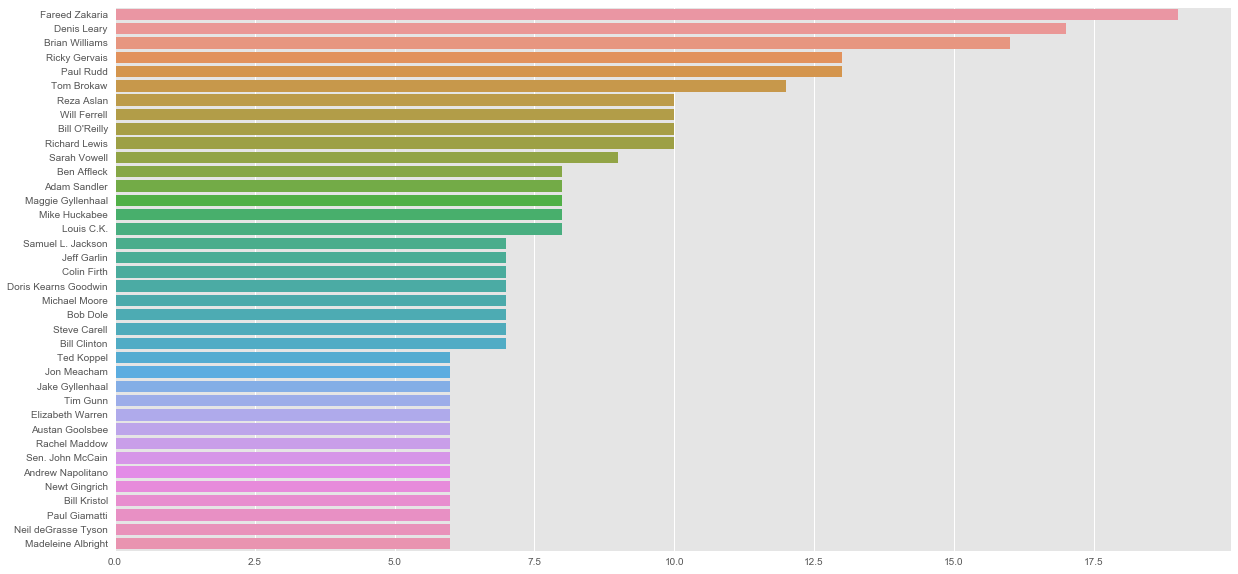

In [20]:
#Plot most frequent guests with more than 5 times on the show
fig = plt.subplots(figsize=(20,10))
sns.barplot(x= [a[1] for a in frequent_guests_list] , y = [a[0] for a in frequent_guests_list])#,color=current_palette)
plt.show()

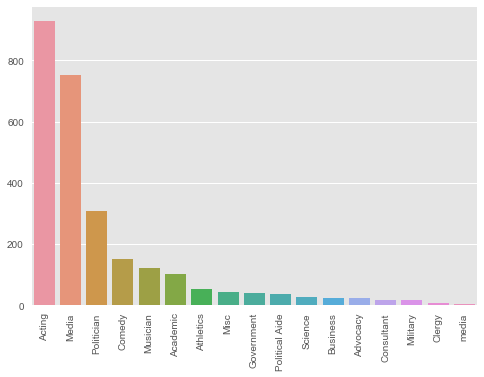

In [21]:
sns.barplot(x= [a[0] for a in frequent_group_list] , y = [a[1] for a in frequent_group_list])
plt.xticks(rotation=90)
plt.show()

In [22]:
'''DATA HAS SOME ASCII CODE '''

#fig = plt.subplots(figsize=(20,10))
#sns.barplot(x= [a[1] for a in one_timer_list] , y = [a[0] for a in one_timer_list])


'DATA HAS SOME ASCII CODE '

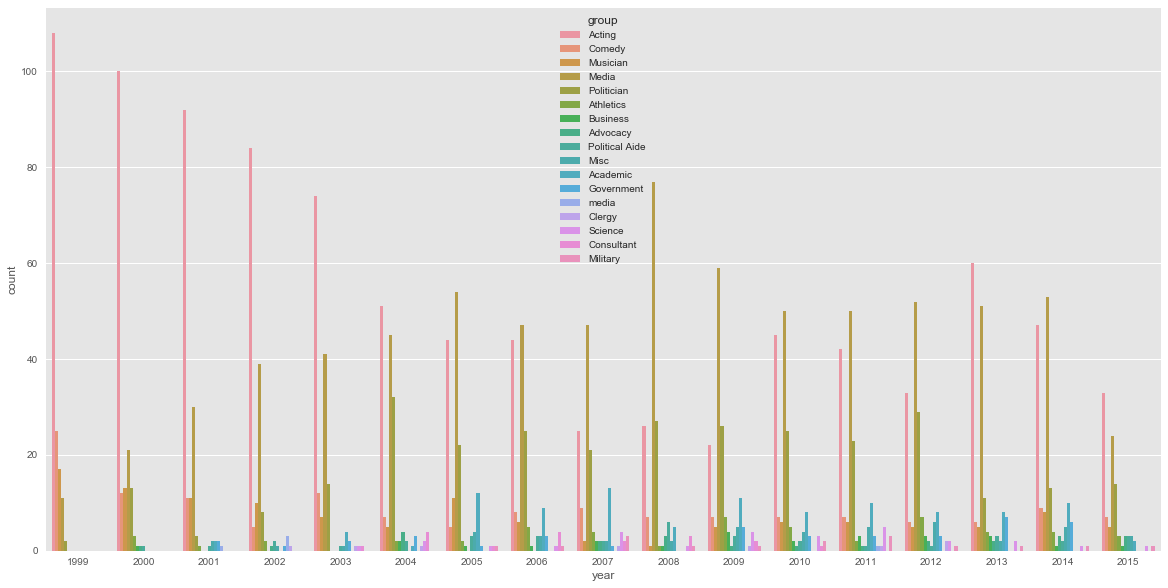

In [25]:
#Plot the guests based on the year 
fig = plt.subplots(figsize=(20,10))
sns.countplot(x="year", hue = "group", data=data)


In [163]:
count_per_year = []
for x in data.groupby('year'):
    count_per_year.extend([(y, x[0], z) for y, z in x[1].group.value_counts().iteritems()])
count_per_year

[('Acting', 1999, 108),
 ('Comedy', 1999, 25),
 ('Musician', 1999, 17),
 ('Media', 1999, 11),
 ('Politician', 1999, 2),
 ('Acting', 2000, 100),
 ('Media', 2000, 21),
 ('Musician', 2000, 13),
 ('Politician', 2000, 13),
 ('Comedy', 2000, 12),
 ('Athletics', 2000, 3),
 ('Advocacy', 2000, 1),
 ('Political Aide', 2000, 1),
 ('Business', 2000, 1),
 ('Acting', 2001, 92),
 ('Media', 2001, 30),
 ('Musician', 2001, 11),
 ('Comedy', 2001, 11),
 ('Politician', 2001, 3),
 ('Misc', 2001, 2),
 ('Government', 2001, 2),
 ('Academic', 2001, 2),
 ('Athletics', 2001, 1),
 ('media', 2001, 1),
 ('Political Aide', 2001, 1),
 ('Acting', 2002, 84),
 ('Media', 2002, 39),
 ('Musician', 2002, 10),
 ('Politician', 2002, 8),
 ('Comedy', 2002, 5),
 ('media', 2002, 3),
 ('Political Aide', 2002, 2),
 ('Athletics', 2002, 2),
 ('Advocacy', 2002, 1),
 ('Government', 2002, 1),
 ('Clergy', 2002, 1),
 ('Misc', 2002, 1),
 ('Acting', 2003, 74),
 ('Media', 2003, 41),
 ('Politician', 2003, 14),
 ('Comedy', 2003, 12),
 ('Musicia

In [175]:
data.group.unique()

array(['Acting', 'Comedy', 'Musician', 'Media', 'Politician', 'Athletics',
       'Business', 'Advocacy', 'Political Aide', 'Misc', 'Academic',
       'Government', 'media', 'Clergy', 'Science', 'Consultant', 'Military'], dtype=object)

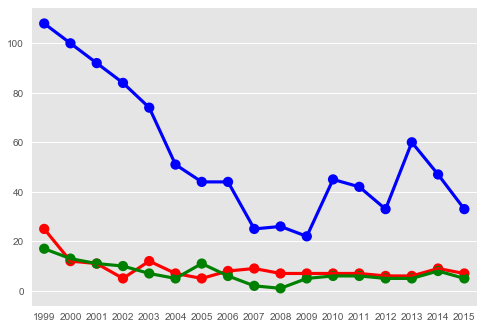

In [181]:
data_for_plotting = [(label, [(x[1], x[2]) for x in count_per_year if x[0] == label]) for label in data.group.unique()]
colors = ['blue', 'red', 'green', 'purple', 'white', 'black']
for i, (label, numbers) in enumerate(data_for_plotting[:3]):
        sns.pointplot(x=[x[0] for x in numbers], y=[x[1] for x in numbers], color=colors[i])

[<matplotlib.text.Text at 0x114269a90>, <matplotlib.text.Text at 0x1141ead10>]

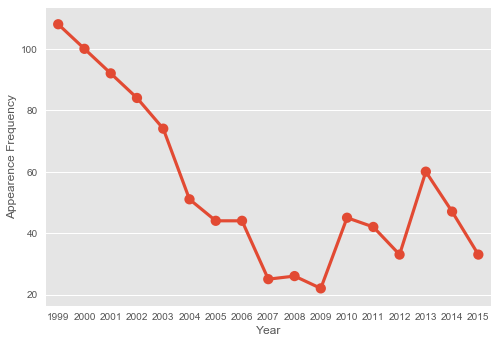

In [174]:
ax = sns.pointplot(x=[x[0] for x in acting], y=[x[1] for x in acting])
ax.set(xlabel='Year', ylabel='Appearence Frequency')

In [121]:
[(x[0],(x[1].group.value_counts())) for x in data.groupby('year')]



#data.group.value_counts()


[(1999, Acting        108
  Comedy         25
  Musician       17
  Media          11
  Politician      2
  Name: group, dtype: int64), (2000, Acting            100
  Media              21
  Musician           13
  Politician         13
  Comedy             12
  Athletics           3
  Advocacy            1
  Political Aide      1
  Business            1
  Name: group, dtype: int64), (2001, Acting            92
  Media             30
  Musician          11
  Comedy            11
  Politician         3
  Misc               2
  Government         2
  Academic           2
  Athletics          1
  media              1
  Political Aide     1
  Name: group, dtype: int64), (2002, Acting            84
  Media             39
  Musician          10
  Politician         8
  Comedy             5
  media              3
  Political Aide     2
  Athletics          2
  Advocacy           1
  Government         1
  Clergy             1
  Misc               1
  Name: group, dtype: int64), (2003, Acting 

### Use NumPy to apply basic summary statistics

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2662 entries, 0 to 2692
Data columns (total 5 columns):
year          2662 non-null int64
occupation    2662 non-null object
date          2662 non-null object
group         2662 non-null object
guest         2662 non-null object
dtypes: int64(1), object(4)
memory usage: 204.8+ KB


In [28]:
data.nunique()

year            17
occupation     396
date          2610
group           17
guest         1646
dtype: int64

In [45]:
#keep this one for latter

#replace groups with codes
list_groups = list(data.group.unique())
data.loc['group'].apply()

[list_groups.index(x)+1 for x in list_groups]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [47]:
y = data[['group']]
X = data.drop(['group'],axis=1)

In [48]:
X.corrwith(y)

year   NaN
dtype: float64

Use K-means and Hierarchical Clustering to get a better understanding of your data. What are the optimal number of clusters with those two methods?

### Choose a target variable